# Telco Churn Analysis

## <ins>Goals</ins>
* Find out what is causing the customer churn at Telco.

* Construct a ML model using classification algorithms that accurately predicts customer churn.

## <ins>Imports</ins>

In [5]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

## <ins>Acquire</ins>

* Data acquired from the Codeup MySQL database `telco_churn`
* It contained 7043 rows and 22 columns before preparing.
* Each row represents an individual customer at Telco
* Each column represents a feature of the customers.

In [6]:
# running the acquire_data() function from my acquire.py file 
# saving this dataframe as the variable 'df'

df = a.acquire_data()

## <ins>Prepare</ins>

* Drop duplicate columns
    * `payment_type_id` *- data exists in the `payment_type` column*
    * `internet_service_type_id` *- data exists in the `internet_service_type` column*
    * `contract_type_id` *- data exists in the `contract_type` column*
* Create `internet_service` column to indicate whether a customer subscribes to internet service & move after `multiple_lines` column
* Correct values & datatypes
    * changed values in the `senior_citizen` column from '1 or 0' to 'Yes or No'
    * changed values in the `churn` column from 'Yes or No' to '1 or 0'
    * filled null values in the `internet_service_type` with 'No internet service' based off of comparison to the `online_security` column
    * changed values in the `total_charges` from an object to a float
* Set the index to the `customer_id` column since this information is a unique identifier
* Split data into 3 new dataframes, stratifying on `churn`:
    * Train - 60% of the original dataframe
    * Validate - 20% of the original dataframe
    * Test - 20% of the original dataframe
* No outliers have been removed

In [7]:
# running the prepare_data() function from my prepare.py file 
# saving dataframe as the variable 'df'

df = p.prepare_data(df)

In [8]:
# running the split_data() function from my prepare.py file
# saving the split dataframes in the following variables: train, validate, test

train, validate, test = p.split_data(df,'churn')

## <ins>Explore</ins>

### How often are customers churning?

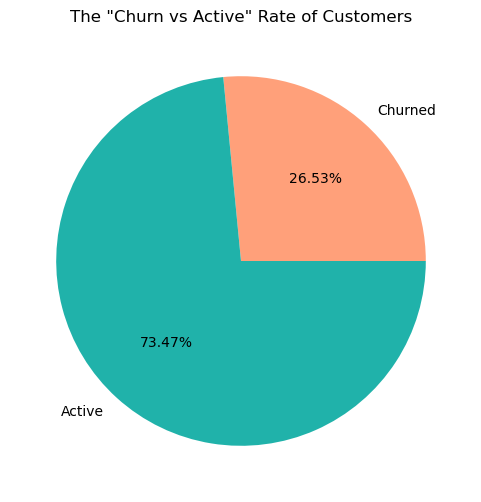

In [9]:
e.pie_churn(train,'churn')

> Customers are churning at 26.53% rate (using the training data)

### Does `tenure` affect the churn rate? 

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between tenure & churn rate

> $H_a$: There IS a relationship between tenure & churn rate

**confidence interval: 95%**

**alpha: .05** 

In [ ]:
# checking the distribution of our continuous variable
sns.histplot(train.tenure,color='lightseagreen');

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [ ]:
e.mann_whitney_tenure(train)

**<ins>Visualization:</ins>**

In [ ]:
e.bar_tenure(train)

> The difference in the average tenure between churned & active customers is 19.85 months.

### Does `monthly_charges` affect the churn rate?

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between monthly_charges & churn rate

> $H_a$: There IS a relationship between monthly_charges & churn rate

**confidence interval: 95%**

**alpha: .05** 

In [ ]:
# checking the distribution of our continuous variable
sns.histplot(train.monthly_charges,color='lightseagreen');

**Since we are comparing a continuous variable to a categorical variable & the continuous variable is NOT normally distributed, we will use the Mann-Whitney test.**

In [ ]:
e.mann_whitney_monthly_charges(train)

**<ins>Visualization:</ins>**

In [ ]:
e.bar_monthly_charges(train)

> The difference in the average monthly charges between churned & active customers is $13.38.

### Does `contract_type` affect the churn rate?

**<ins>Hypothesis Testing:</ins>**

**Formulate a null and alternative hypothesis**

> $H_0$: There is NO relationship between contract_type & churn rate

> $H_a$: There IS a relationship between contract_type & churn rate

**confidence interval: 95%**

**alpha: .05**

**Since we are comparing two categorical variables, we will use the $χ^2$ test.**

In [8]:
e.chi_squared_contract_type(train)

There IS a relationship between contract_type & churn rate!


**<ins>Visualization</ins>**

In [ ]:
e.pie_churn_by_contract_type(train)

> There is a 32% difference in churn rate between the month-to-month contracts & one-year contracts

> There is a 40% difference in churn rate between the month-to-month contracts & two-year contracts

> There is an 8% difference in churn rate between the one-year contracts & two-year contracts

## <ins>Model</ins>

In [ ]:
train,validate,test = m.preprocess(train,validate,test)

### Decision Tree

In [ ]:
test_acc_dt = m.decision_tree(train,validate,test)

### Random Forest

In [ ]:
test_acc_rf = m.random_forest(train, validate, test)

### KNN 

In [ ]:
test_acc_knn = m.knn(train,validate,test)

### Logistic Regression

In [ ]:
test_acc_logit = m.logistic_regression(train,validate,test)